# Experimentacion 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import math



In [2]:
def porcentajeDeProtocolos(path, x_axis, y_axis):
    df = pd.read_csv(path)
    df.drop(index = [0, 1] , inplace=True)
    sns.set(style="whitegrid")
    chart = sns.barplot(x=x_axis,y=y_axis, data=df, palette='Spectral', fmt='d')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

def DistribucionPorTipoFuente(path):
    
    # Leo los datos.
    df = pd.read_csv(path)

    # Integro los broadcast de distintos protocolos a 'BROADCAST' para que solo haya 1 columna.
    dfb=df.filter(like='BROADCAST')
    dfb=dfb.sum(axis = 1, skipna = True)
    
    # Integro los unicast de distintos protocolos a 'UNICAST' para que solo haya 1 columna.
    dfu=df.filter(like='UNICAST')
    dfu=dfu.sum(axis = 1, skipna = True)
    
    # Aplico los cambios
    dft=df.iloc[:, 0]
    df=pd.concat([dft, dfb, dfu], axis=1)
    df.columns =['Time', 'BROADCAST', 'UNICAST']
    df = df.tail(1)
    df = df.stack().reset_index(-1).iloc[:, ::-1]
    
    # Les cambio los nombres a las columnas
    df.columns = ['cantidad de apariciones', 'simbolo']
    df = df.rename(columns={0: "cantidad de apariciones", "simbolos": "simbolo"})
    df = df.iloc[1:]
    print(df)
    #Plot
    sns.set(style="whitegrid")
    chart = sns.barplot(x="simbolo",y="cantidad de apariciones", data=df, palette='Spectral')
    chart.set(yscale="linear")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    chart.figure.savefig('distribucionPorFuente.png',bbox_inches='tight')
    
def InformacionPorSimbolo(path):
    
 

    #Leo y me quedo con la ultima fila que son los valores finales.
    df = pd.read_csv(path)
    df = df.tail(1)
    df = df.stack().reset_index(-1).iloc[:, ::-1]
    # Les cambio los nombres a las columnas 
    df.columns = ['informacion', 'simbolo']
    df = df.rename(columns={0: "informacion", "simbolos": "simbolo"})
    df = df.iloc[1:]
    
    #Calculo la informacion de los eventos
    df['informacion'] = ((df['informacion'] / df['informacion'].sum()))
    df['informacion'] = df['informacion'].astype(np.float64)
    df['informacion'] = - np.log(df['informacion'])
   
    #Plot
    sns.set(style="whitegrid")
    chart2 = sns.barplot(x="simbolo",y="informacion", data=df, palette='Spectral')
    chart2.set(yscale="linear")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
    chart2.figure.savefig('informacionporsimbolo.png',bbox_inches='tight')
    

    

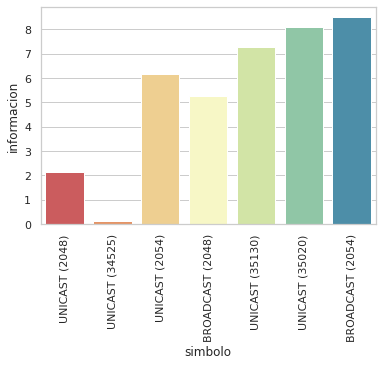

In [3]:
InformacionPorSimbolo('../capturas.csv')



In [10]:
print("HOLA" in ["HOLA asd", "aksldklsad"])

False


     cantidad de apariciones    simbolo
9907                    53.0  BROADCAST
9907                  9855.0    UNICAST


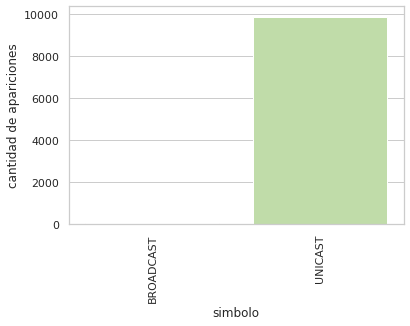

In [5]:
DistribucionPorTipoFuente('../capturas.csv')